<a href="https://colab.research.google.com/github/blandersonw/CNN_Learning_and_Practice/blob/main/LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for working on Convolutional Neural Networks!

Date Links: 
https://docs.google.com/document/d/1SPlRf4yewUFx5ECQLSB53_NJnhXr-dNYvXFIp6zimVk/edit


# Linear Classification

In [ ]:
!wget https://lazyprogrammer.me/course_files/arrhythmia.data

--2022-12-31 20:34:54--  https://lazyprogrammer.me/course_files/arrhythmia.data
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/octet-stream]
Saving to: ‘arrhythmia.data.1’

arrhythmia.data.1   100%[===================>] 392.92K   810KB/s    in 0.5s    

2022-12-31 20:34:55 (810 KB/s) - ‘arrhythmia.data.1’ saved [402355/402355]



Classification

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.data.shape
#N, d

(569, 30)

In [ ]:
data.target.shape
#Use data^^ to predict target

(569,)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=.33)

N,D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation="sigmoid")])

In [ ]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [ ]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 0.4274 - accuracy: 0.8793 - val_loss: 0.3969 - val_accuracy: 0.8883
Epoch 2/100
12/12 [==============================] - 0s 20ms/step - loss: 0.3946 - accuracy: 0.8898 - val_loss: 0.3637 - val_accuracy: 0.9202
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.3664 - accuracy: 0.9003 - val_loss: 0.3357 - val_accuracy: 0.9149
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3424 - accuracy: 0.9081 - val_loss: 0.3120 - val_accuracy: 0.9309
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3221 - accuracy: 0.9186 - val_loss: 0.2919 - val_accuracy: 0.9309
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3045 - accuracy: 0.9213 - val_loss: 0.2746 - val_accuracy: 0.9468
Epoch 7/100
12/12 [==============================] - 0s 12ms/step - loss: 0.2891 - accuracy: 0.9239 - val_loss: 0.2597 - val_accuracy: 0.9468
Epoch 8/10

In [ ]:
print("Train score:", model.evaluate(X_train,y_train))

12/12 [==============================] - 0s 4ms/step - loss: 0.0871 - accuracy: 0.9790
Train score: [0.0870545357465744, 0.9790025949478149]


In [ ]:
print("Train score:", model.evaluate(X_test,y_test))

6/6 [==============================] - 0s 4ms/step - loss: 0.0756 - accuracy: 0.9787
Train score: [0.07556711137294769, 0.978723406791687]


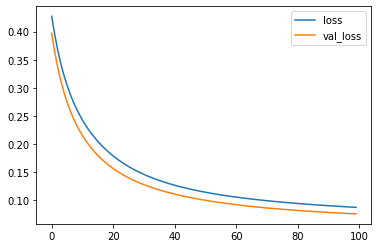

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

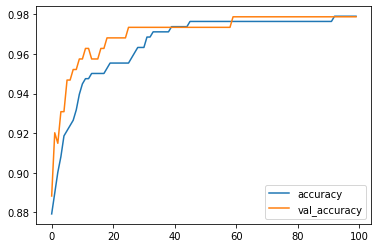

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Manual Prediction

In [ ]:
P = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
P = np.round(P).flatten()

In [ ]:
print("Manually calculated:", np.mean(P == y_test))
print("Evaluate ouput:", model.evaluate(X_test, y_test))

Manually calculated: 0.574468085106383
6/6 [==============================] - 0s 6ms/step - loss: 0.0756 - accuracy: 0.9787
Evaluate ouput: [0.07556711137294769, 0.978723406791687]


#Saving / Loading Model

SAVING A MODEL LOCALLY IN DRIVE

In [ ]:
model.save('linearclassifier.h5')

In [ ]:
!ls -lh

total 816K
-rw-r--r-- 1 root root 393K Apr  3  2020 arrhythmia.data
-rw-r--r-- 1 root root 393K Apr  3  2020 arrhythmia.data.1
-rw-r--r-- 1 root root  19K Dec 31 20:35 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Dec 20 20:19 sample_data


In [ ]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9787


[0.07556711137294769, 0.978723406791687]

Go to files, and download the .h5 files in order to download the model to your hardware.